In [2]:
import pandas as pd
import numpy as np

uri = open("data_complet_add_columns_2019.csv", "r")

data = pd.read_csv(uri)

data = data.dropna()

data ['Return'] = data['Close'].pct_change()*100


data.head()

,Unnamed: 0,Unnamed: 0.1,date2,hour,favorites count,favorites mean,retweets mean,retweets count,RT_score mean,RT_score count,...,Daily Weight mean,Daily Weight count,blob_sent mean,subjectivity mean,vader_sent mean,Close,price dir,movement,month,Return
0,0,0,2019-01-01,0,2,76335.500000,12856.0,2,5.077337,2,...,12.327789,2,2.080815,0.450000,5.067590,3700.31,0.000,0.0,1.0,NaN
1,1,1,2019-01-01,1,1,18.000000,17.0,1,2.833213,1,...,6.723585,1,-1.050560,0.343750,1.990181,3689.69,3.538,1.0,1.0,-0.287003
2,2,2,2019-01-01,2,4,5117.750000,188.5,4,2.923718,4,...,7.659360,4,0.825660,0.200000,1.920760,3690.00,3.656,1.0,1.0,0.008402
3,3,3,2019-01-01,3,2,83.500000,3.5,2,0.895880,2,...,3.451874,2,0.000000,0.263636,2.885766,3693.13,1.340,1.0,1.0,0.084824
4,4,4,2019-01-01,4,3,294.333333,10.0,3,1.772707,3,...,5.519929,3,0.000000,0.166667,1.426325,3692.71,-2.038,0.0,1.0,-0.011372


In [3]:

important_columns = ["vader_sent mean", "blob_sent mean", "subjectivity mean", "favorites mean", "retweets mean", "RT_score mean"]
x = data[important_columns]


y = data[["movement"]]
y = y.astype(int)

In [4]:
print(y.values.ravel())

[0 1 1 ... 0 0 0]


In [5]:
#Com LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 1
np.random.seed(SEED)

practice_x, test_x, practice_y, test_y = train_test_split(x, y, test_size = 0.33, random_state=42)

model = LinearSVC()
model.fit(practice_x, practice_y.values.ravel())
predictions = model.predict(test_x)

accuracy_rate = accuracy_score(test_y, predictions)*100
accuracy_rate

G:\SoftwaresEng\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


47.55700325732899

In [6]:
#Com SVC não linear

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 1
np.random.seed(SEED)

practice_x, test_x, practice_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

model = SVC(gamma='auto')
model.fit(practice_x, practice_y.values.ravel())
predictions = model.predict(test_x)

accuracy_rate = accuracy_score(test_y, predictions)*100
accuracy_rate

52.02702702702703

In [7]:
#Usando standartScaler
from sklearn.preprocessing import StandardScaler

SEED = 1
np.random.seed(SEED)

raw_practice_x, raw_test_x, practice_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

scaler = StandardScaler()
scaler.fit(raw_practice_x)
practice_x = scaler.transform(raw_practice_x) 
test_x = scaler.transform(raw_test_x)

model = SVC(gamma='auto')
model.fit(practice_x, practice_y.values.ravel())
predictions = model.predict(test_x)

accuracy_rate = accuracy_score(test_y, predictions)*100
accuracy_rate

52.64127764127764

<AxesSubplot:xlabel='blob_sent mean', ylabel='Return'>

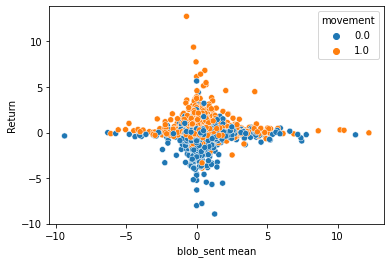

In [8]:
import seaborn as sns

sns.scatterplot(x="blob_sent mean", y="Return", hue="movement", data=data)

<AxesSubplot:xlabel='subjectivity mean', ylabel='Return'>

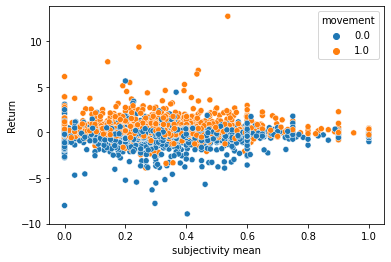

In [9]:
import seaborn as sns

sns.scatterplot(x="subjectivity mean", y="Return", hue="movement", data=data)

<AxesSubplot:xlabel='vader_sent mean', ylabel='Return'>

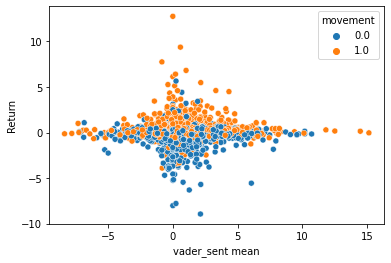

In [10]:
import seaborn as sns

sns.scatterplot(x="vader_sent mean", y="Return", hue="movement", data=data)

In [11]:
#dummy aleatório

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(practice_x, practice_y)
predictions = dummy.predict(test_x)

accuracy_dummy = accuracy_score(test_y, predictions) * 100
print("A acurácia do dummy foi %.2f%%" % accuracy_dummy)

A acurácia do dummy foi 52.95%


In [12]:
#dummy aleatório com strat most frequent

from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(practice_x, practice_y)
predictions = dummy_mostfrequent.predict(test_x)

accuracy_dummy = accuracy_score(test_y, predictions) * 100
print("A precisão do dummy foi %.2f%%" % accuracy_dummy)

A precisão do dummy foi 52.95%


In [13]:
#Utilizando spliter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 1
np.random.seed(SEED)
raw_practice_x, raw_test_x, practice_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(practice_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(raw_practice_x)
practice_x = scaler.transform(raw_practice_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(practice_x, practice_y.values.ravel())
predictions_improved = model.predict(test_x)

accuracy_improved = accuracy_score(test_y, predictions_improved) * 100
print("A precisão foi %.2f%%" % accuracy_improved)

Treinaremos com 4883 elementos e testaremos com 1628 elementos
A precisão foi 52.64%


In [14]:
#decision three

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


SEED = 1
np.random.seed(SEED)
raw_practice_x, raw_test_x, practice_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(practice_x), len(test_x)))

model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_practice_x, practice_y)
prediction_three = model.predict(raw_test_x)

accuracy_three = accuracy_score(test_y, prediction_three) * 100
print("A precisão foi %.2f%%" % accuracy_three)

Treinaremos com 4883 elementos e testaremos com 1628 elementos
A precisão foi 51.90%


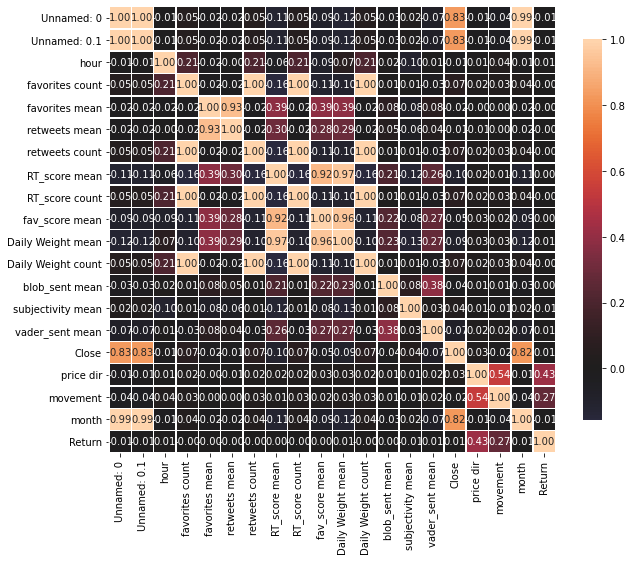

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



train = data


def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(train)

<AxesSubplot:xlabel='RT_score mean', ylabel='Return'>

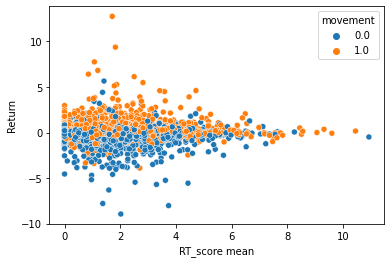

In [17]:
sns.scatterplot(x="RT_score mean", y="Return", hue="movement", data=data)

<AxesSubplot:xlabel='retweets mean', ylabel='Return'>

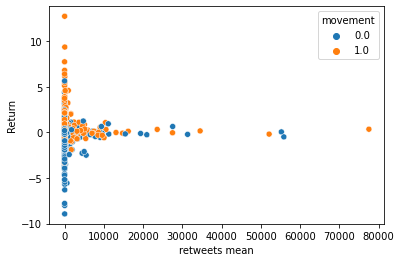

In [19]:
sns.scatterplot(x="retweets mean", y="Return", hue="movement", data=data)